<a href="https://colab.research.google.com/github/DurantZhou/data_exploration/blob/main/Out_of_Stock0823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
import sqlite3 # importsing the sqlite3 module which provides an interface for SQLite databases
connection = sqlite3.connect('Stock0815.csv') # setting up connection with the database
cursor = connection.cursor() #Creating a cursor object to execute SQL commands within the database

In [4]:
import pandas as pd
import sqlite3

# 读取CSV文件到一个DataFrame
df = pd.read_csv('Stock0823.csv')

# 连接到（或创建）一个SQLite数据库
connection = sqlite3.connect('Stock0823.db')
cursor = connection.cursor()

# 将DataFrame写入SQLite数据库
df.to_sql('Stock0823', connection, if_exists='replace', index=False)



109

In [5]:
sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''
# SQL query to retrieve the names of all tables in the SQLite database
cursor.execute(sql) # Executing the SQL query using the cursor.execute() method
cursor.fetchall() #Fetching all the results returned by the SQL query using the cursor.fetchall() method

[('Stock0823',)]

sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''
# SQL query to retrieve the names of all tables in the SQLite database
cursor.execute(sql) # Executing the SQL query using the cursor.execute() method
cursor.fetchall() #Fetching all the results returned by the SQL query using the cursor.fetchall() method

In [7]:
sql = '''
PRAGMA table_info('Stock0823');
'''# SQL query to retrieve column information for the 'AUS_energy' table
cursor.execute(sql) # Executing the SQL query using the cursor.execute() method
cursor.fetchall() # Fetching all the results returned by the SQL query using the cursor.fetchall() method

[(0, 'suburb', 'TEXT', 0, None, 0),
 (1, 'Account', 'TEXT', 0, None, 0),
 (2, 'Industry', 'TEXT', 0, None, 0),
 (3, 'Order', 'TEXT', 0, None, 0),
 (4, 'Out of Stock', 'TEXT', 0, None, 0),
 (5, 'Description', 'TEXT', 0, None, 0),
 (6, 'Quantity', 'REAL', 0, None, 0),
 (7, 'Out of Stock.1', 'TEXT', 0, None, 0),
 (8, 'Description.1', 'TEXT', 0, None, 0),
 (9, 'Quantity.1', 'REAL', 0, None, 0),
 (10, 'Out of Stock.2', 'TEXT', 0, None, 0),
 (11, 'Description.2', 'TEXT', 0, None, 0),
 (12, 'Quantity.2', 'REAL', 0, None, 0),
 (13, 'Out of Stock.3', 'TEXT', 0, None, 0),
 (14, 'Description.3', 'TEXT', 0, None, 0),
 (15, 'Quantity.3', 'REAL', 0, None, 0),
 (16, 'Out of Stock.4', 'TEXT', 0, None, 0),
 (17, 'Description.4', 'TEXT', 0, None, 0),
 (18, 'Quantity.4', 'REAL', 0, None, 0),
 (19, 'Out of Stock.5', 'TEXT', 0, None, 0),
 (20, 'Description.5', 'TEXT', 0, None, 0),
 (21, 'Quantity.5', 'REAL', 0, None, 0),
 (22, 'Out of Stock.6', 'TEXT', 0, None, 0),
 (23, 'Description.6', 'TEXT', 0, None, 0

In [10]:
import pandas as pd #importing the pandas library
sql = '''
SELECT * FROM [Stock0823];
''' # SQL query to select all data from the 'AUS_energy' table

Stock0823_df = pd.read_sql_query(sql,connection) #Load the data into a DataFrame
# 使用Pandas的fillna方法将NaN值替换为'novalue'
Stock0815_df.fillna('', inplace=True)





In [11]:
Stock0823_df.head()# exploring the data of heads from the dataframe

,suburb,Account,Industry,Order,Out of Stock,Description,Quantity,Out of Stock.1,Description.1,Quantity.1,...,Quantity.11,Out of Stock.12,Description.12,Quantity.12,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Perth,Grab n Go 323,Deli & Convenience store,S006884,GM0021,Super Glue 4PK,6.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
1,Perth,Murray Convenience,Deli & Convenience store,S006930,GM0005,UNO 2PK,12.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
2,Perth,All Day Mini Mart,Deli & Convenience store,S006932,GM0031,Baby Wipes 120 Sheets,12.0,PC0010,Three Blade Blue Disposable Razor 3PK,12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
3,Perth,TSG Murray St,Deli & Convenience store,S006931,GM0021,Super Glue 4PK,6.0,OS0073,Black Gel Pen 2pcs,12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
4,Perth,Stop n Shop Concenient,Deli & Convenience store,S006967,GM0008,100% Plastic Playing Card 1PK,12.0,GM0021,Super Glue 4PK,6.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN


In [13]:
Stock0823_df.tail()# exploring the data of heads from the dataframe

,suburb,Account,Industry,Order,Out of Stock,Description,Quantity,Out of Stock.1,Description.1,Quantity.1,...,Quantity.11,Out of Stock.12,Description.12,Quantity.12,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
104,None,Chan Thar Pty Ltd,Oriental Store,S007012,KW0082,25 in 1 Zipper Slider Bag 17.8x20.3cm,8.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
105,None,Maihan WA Maddington,Oriental Grocery,S007010,KW0193,Seasoning Pot 300ml,24.0,KW0194,Seasoning Pot 300ml,24.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
106,None,Helena valley fresh,Supermarket,S007004,HW0103,Liquid Auto-refill Soft Brush\r\n46*4*8.5,6.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
107,None,Syrian market,Supermarket,S007025,GM0021,Super Glue 4PK,12.0,HW0075,48CM Toilet plunger,12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
108,None,Burmese World Trading Pty Ltd,Convenience Store,S006993,KW0064,3 in 1 360 Degree Roto Peeler,12.0,KW0131,"8"" Porcelain Bowl",12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN


In [14]:
Stock0823_df # exploring the whole dataframe

,suburb,Account,Industry,Order,Out of Stock,Description,Quantity,Out of Stock.1,Description.1,Quantity.1,...,Quantity.11,Out of Stock.12,Description.12,Quantity.12,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Perth,Grab n Go 323,Deli & Convenience store,S006884,GM0021,Super Glue 4PK,6.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
1,Perth,Murray Convenience,Deli & Convenience store,S006930,GM0005,UNO 2PK,12.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
2,Perth,All Day Mini Mart,Deli & Convenience store,S006932,GM0031,Baby Wipes 120 Sheets,12.0,PC0010,Three Blade Blue Disposable Razor 3PK,12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
3,Perth,TSG Murray St,Deli & Convenience store,S006931,GM0021,Super Glue 4PK,6.0,OS0073,Black Gel Pen 2pcs,12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
4,Perth,Stop n Shop Concenient,Deli & Convenience store,S006967,GM0008,100% Plastic Playing Card 1PK,12.0,GM0021,Super Glue 4PK,6.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,None,Chan Thar Pty Ltd,Oriental Store,S007012,KW0082,25 in 1 Zipper Slider Bag 17.8x20.3cm,8.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
105,None,Maihan WA Maddington,Oriental Grocery,S007010,KW0193,Seasoning Pot 300ml,24.0,KW0194,Seasoning Pot 300ml,24.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
106,None,Helena valley fresh,Supermarket,S007004,HW0103,Liquid Auto-refill Soft Brush\r\n46*4*8.5,6.0,None,None,NaN,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
107,None,Syrian market,Supermarket,S007025,GM0021,Super Glue 4PK,12.0,HW0075,48CM Toilet plunger,12.0,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN


# ***Data Exploration***

## ***Most out of stock products***

Product   Description                                                              
DVBAG01   Medium Kraft Paper Bag 21*11*21H (25/300 a carton)                           750
KW0137    Disposable Bamboo Chopsticks 50PK                                            408
KW0024    Toothpick 3PK                                                                354
KW0158    70mm Sauce Dish                                                              351
GM0021    Super Glue 4PK                                                               336
KW0136    2 in 1 35g Stainless Steel Ball                                              285
DVBAG02   Large Kraft Paper Bag 30*18*30.5H (250 in a carton)                          250
GM0005    UNO 2PK                                                                      210
PC0018    Cotton swab w bamboo stick 100pcs\r\n(12 in a pack)                          132
GM0008    100% Plastic Playing Card 1PK                                                123
HW0085

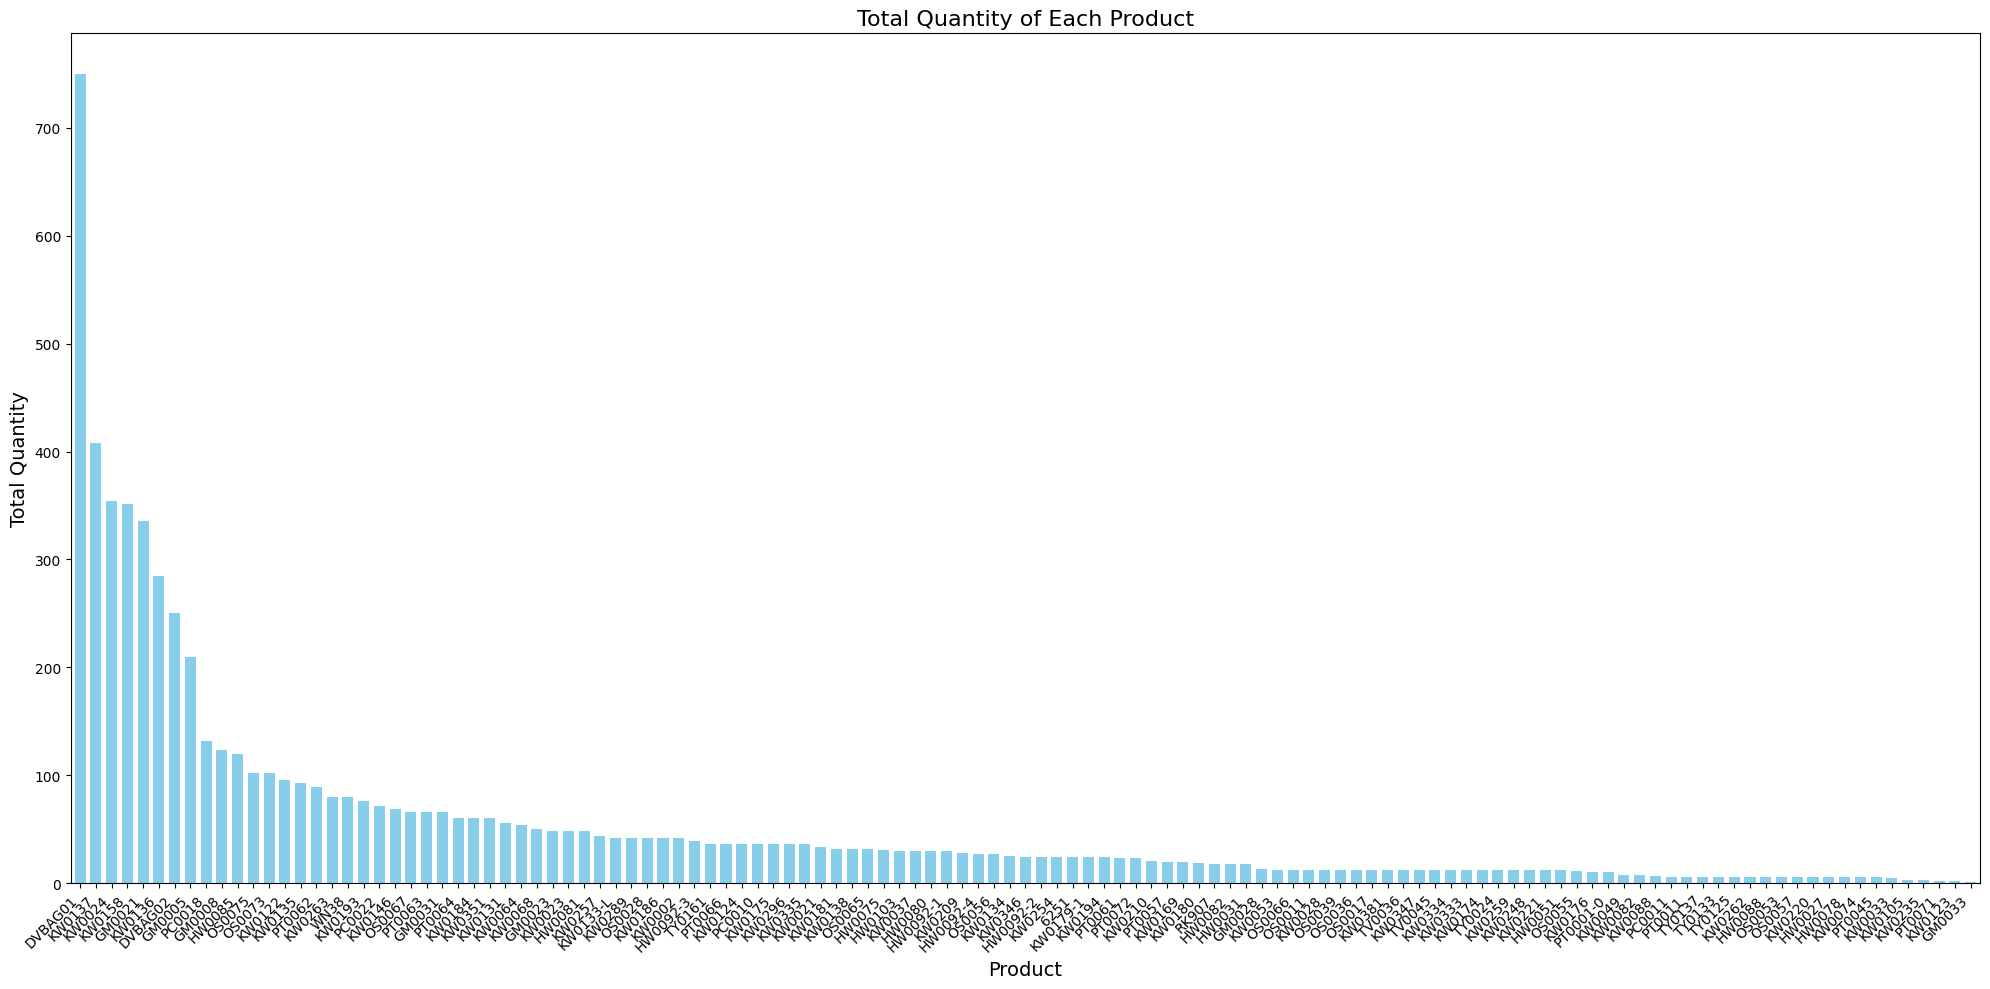

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 合并所有的 'Out of Stock' 和相应的 'Quantity' 列
products = []
quantities = []
descriptions = []

for i in range(13):  # 假设有13对 'Out of Stock' 和 'Quantity' 列
    product_col = f'Out of Stock'
    quantity_col = f'Quantity'
    description_col = f'Description'
    if i > 0:
        product_col += f'.{i}'
        quantity_col += f'.{i}'
        description_col += f'.{i}'

    products.extend(Stock0823_df[product_col])
    quantities.extend(Stock0823_df[quantity_col])
    descriptions.extend(Stock0823_df[description_col])

# 创建一个DataFrame来存储合并后的产品、描述和数量
data = pd.DataFrame({'Product': products, 'Description': descriptions, 'Quantity': quantities})

# 删除 'Product' 和 'Description' 列中的 NaN 值，保留这些列中有值的行
data.dropna(subset=['Product', 'Description'], inplace=True)

# 将数量中的NaN值填充为0
data['Quantity'].fillna(0, inplace=True)

# 确保 'Quantity' 列是数值类型，并将其转换为整数
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce').fillna(0).astype(int)

# 计算每个产品的总数量
product_totals = data.groupby(['Product', 'Description'])['Quantity'].sum().sort_values(ascending=False)

# 设置Pandas显示选项，以完整显示内容
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_colwidth', None)  # 不截断列内容

# 打印产品总数，确保数量为整数
print(product_totals)

# 只使用产品名绘制柱状图
plt.figure(figsize=(20, 10))
product_totals.index = product_totals.index.get_level_values('Product')  # 只使用Product作为x轴标签
product_totals.plot(kind='bar', color='skyblue', width=0.7)
plt.title('Total Quantity of Each Product', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


***Most out of stock products_MCQ***

Product_Description
KW0024 - Toothpick 3PK                                                            132
KW0122 - Porcelain Chinese Tea Cups (Round)                                        96
KW0135 - 8" Porcelain Soup Bowl 20.5*20.5*11                                       93
HW0085 - 80pcs Garbage Bag Drawight  ~40L                                          84
KW0158 - 70mm Sauce Dish                                                           63
KW0184 - Beer mug                                                                  48
KW0193 - Seasoning Pot 300ml                                                       48
KW0146 - 4' Shadow Yellow Bowl                                                     45
KW0257 - Chinese Tea Pot (Layer design)                                            44
KW0263 - 24cm Bamboo Steamer Basin                                                 44
KW0335 - Snowy blue dinner fish plate 17.3*25.5*5cm                                36
KW0124 - Porcelain Round tall tea 

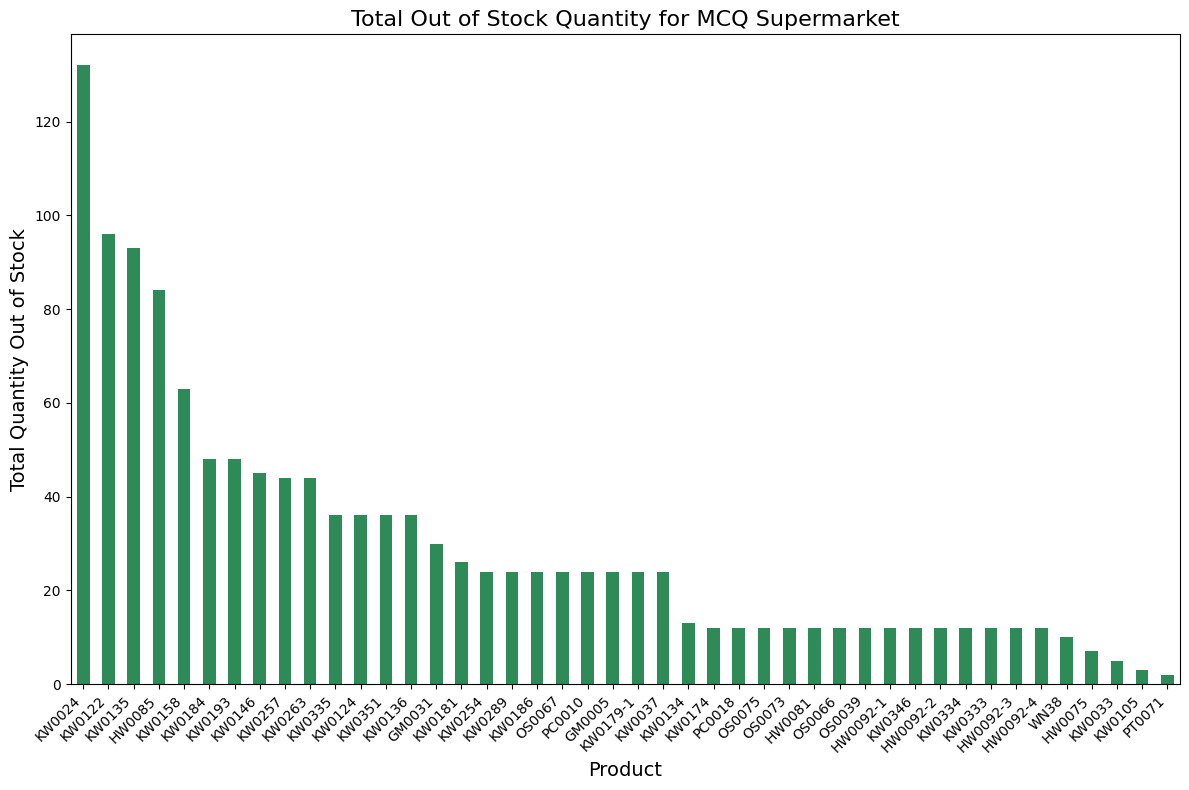

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 data 是整个数据集的 DataFrame
# 过滤出 Industry 为 "MCQ" 的行
mcq_data = Stock0823_df[Stock0823_df['Industry'].str.contains('MCQ', na=False)]

# 合并所有的 'Out of Stock' 和相应的 'Quantity' 列
products = []
quantities = []
descriptions = []

for i in range(13):  # 假设有13对 'Out of Stock' 和 'Quantity' 列
    product_col = f'Out of Stock'
    quantity_col = f'Quantity'
    description_col = f'Description'
    if i > 0:
        product_col += f'.{i}'
        quantity_col += f'.{i}'
        description_col += f'.{i}'

    products.extend(mcq_data[product_col])
    quantities.extend(mcq_data[quantity_col])
    descriptions.extend(mcq_data[description_col])

# 创建一个DataFrame来存储产品、描述和数量
mcq_products = pd.DataFrame({'Product': products, 'Description': descriptions, 'Quantity': quantities})

# 删除 NaN 值
mcq_products.dropna(inplace=True)

# 确保 'Quantity' 列是数值类型，并转换为整数
mcq_products['Quantity'] = pd.to_numeric(mcq_products['Quantity'], errors='coerce').fillna(0).astype(int)

# 合并 'Product' 和 'Description' 为一个新的列 'Product_Description'
mcq_products['Product_Description'] = mcq_products['Product'] + ' - ' + mcq_products['Description']

# 计算每个产品的总缺货数量（不合并描述）
mcq_product_totals = mcq_products.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False)

# 只获取产品名用于x轴标签
product_names = mcq_products.groupby('Product')['Quantity'].sum().sort_values(ascending=False).index

# 设置Pandas显示选项，以完整显示内容
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_colwidth', None)  # 不截断列内容

# 打印产品总数，显示产品和描述的组合
print(mcq_product_totals)

# 可视化结果，仅显示产品名称
plt.figure(figsize=(12, 8))
mcq_product_totals.plot(kind='bar', color='Seagreen')
plt.title('Total Out of Stock Quantity for MCQ Supermarket', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity Out of Stock', fontsize=14)
plt.xticks(ticks=range(len(product_names)), labels=product_names, rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


### ***Most out of stock products_NP***

Product_Description
KW0158 - 70mm Sauce Dish                                                          120
KW0137 - Disposable Bamboo Chopsticks 50PK                                         96
PT0062 - Eco Sugarcane Biodegradable Spork 50pcs                                   48
GM0023 - Garden Gloves Size 10                                                     24
KW0136 - 2 in 1 35g Stainless Steel Ball                                           24
HW0082 - 120L 100*120 10pcs                                                        12
HW0092-3 - Rose Toilet Cleaner Gel Air Freshener Aromatic Flower Deodorant         12
KW0021 - Chinese chopsticks 10 Pair 26.5cm Black                                   12
KW0296 - 15cm*3mm Bamboo Skewers 100PK                                             12
KW0131 - 8" Porcelain Bowl                                                          8
HW0092-1 - Lavender Toilet Cleaner Gel Air Freshener Aromatic Flower Deodorant      6
HW0092-4 - Lemon Toilet Cleaner Ge

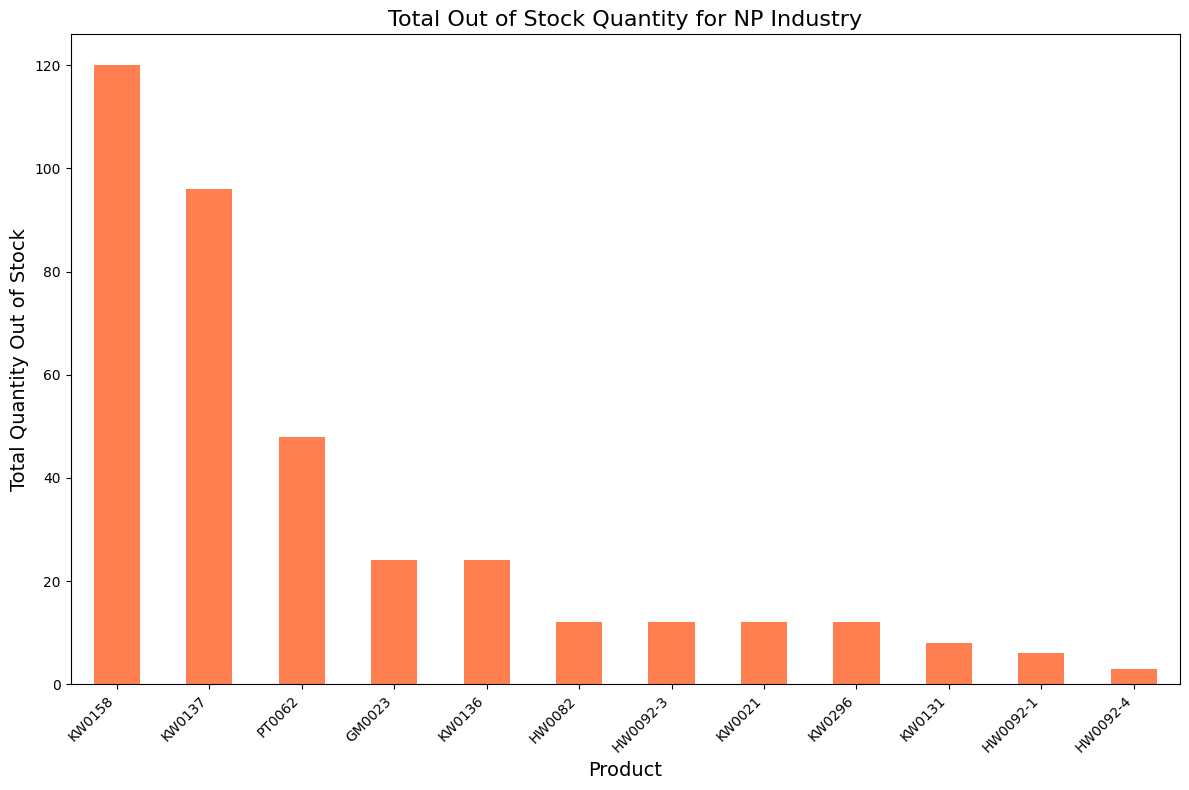

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 Stock0815_df 是整个数据集的 DataFrame
# 过滤出 Industry 为 "NP" 的行
np_data = Stock0823_df[Stock0823_df['Industry'].str.contains('NP', na=False)]

# 合并所有的 'Out of Stock' 和相应的 'Quantity' 列
products = []
quantities = []
descriptions = []

for i in range(13):  # 假设有13对 'Out of Stock' 和 'Quantity' 列
    product_col = f'Out of Stock'
    quantity_col = f'Quantity'
    description_col = f'Description'
    if i > 0:
        product_col += f'.{i}'
        quantity_col += f'.{i}'
        description_col += f'.{i}'

    products.extend(np_data[product_col])
    quantities.extend(np_data[quantity_col])
    descriptions.extend(np_data[description_col])

# 创建一个DataFrame来存储产品、描述和数量
np_products = pd.DataFrame({'Product': products, 'Description': descriptions, 'Quantity': quantities})

# 删除 NaN 值
np_products.dropna(inplace=True)

# 确保 'Quantity' 列是数值类型，并转换为整数
np_products['Quantity'] = pd.to_numeric(np_products['Quantity'], errors='coerce').fillna(0).astype(int)

# 过滤掉数量为0的行
np_products = np_products[np_products['Quantity'] > 0]

# 合并 'Product' 和 'Description' 为一个新的列 'Product_Description'
np_products['Product_Description'] = np_products['Product'] + ' - ' + np_products['Description']

# 计算每个产品的总缺货数量（不合并描述）
np_product_totals = np_products.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False)

# 只获取产品名用于x轴标签
product_names = np_products.groupby('Product')['Quantity'].sum().sort_values(ascending=False).index

# 设置Pandas显示选项，以完整显示内容
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_colwidth', None)  # 不截断列内容

# 打印产品总数，显示产品和描述的组合
print(np_product_totals)

# 可视化结果，仅显示产品名称
plt.figure(figsize=(12, 8))
np_product_totals.plot(kind='bar', color='coral')
plt.title('Total Out of Stock Quantity for NP Industry', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity Out of Stock', fontsize=14)
plt.xticks(ticks=range(len(product_names)), labels=product_names, rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


### ***Most out of stock products_Deli&Convenience Store***

Product_Description
GM0005 - UNO 2PK                                                                      54
GM0021 - Super Glue 4PK                                                               48
OS0075 - Blue Gel Pen 2pcs                                                            48
GM0008 - 100% Plastic Playing Card 1PK                                                39
KW0136 - 2 in 1 35g Stainless Steel Ball                                              36
PC0022 - 120G Coolwhite Toothpaste                                                    36
PC0018 - Cotton swab w bamboo stick 100pcs\r\n(12 in a pack)                          36
OS0073 - Black Gel Pen 2pcs                                                           36
GM0031 - Baby Wipes 120 Sheets                                                        36
WN38 - Travel Adapter Aus Std w Safety Shutter                                        30
KW0024 - Toothpick 3PK                                                                18
O

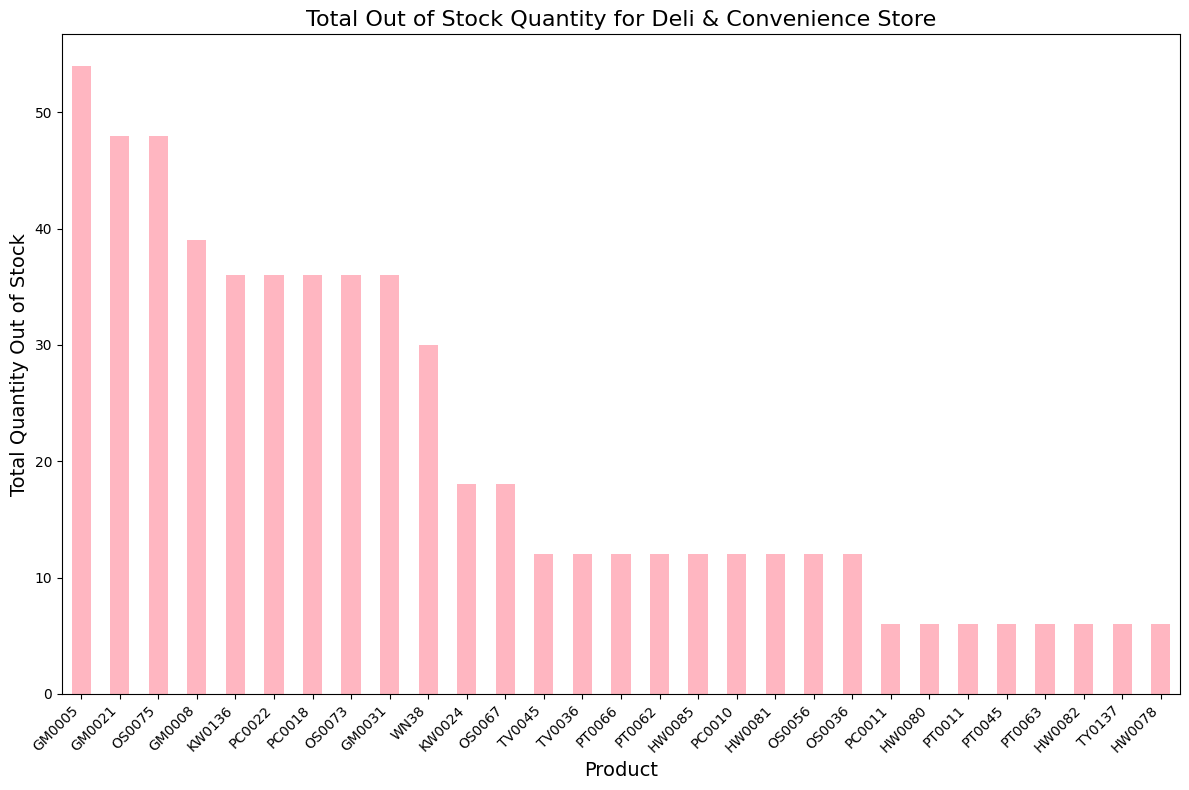

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 Stock0815_df 是整个数据集的 DataFrame
# 过滤出 Industry 为 "NP" 的行
np_data = Stock0823_df[Stock0823_df['Industry'].str.contains('Deli & Convenience store', na=False)]

# 合并所有的 'Out of Stock' 和相应的 'Quantity' 列
products = []
quantities = []
descriptions = []

for i in range(13):  # 假设有13对 'Out of Stock' 和 'Quantity' 列
    product_col = f'Out of Stock'
    quantity_col = f'Quantity'
    description_col = f'Description'
    if i > 0:
        product_col += f'.{i}'
        quantity_col += f'.{i}'
        description_col += f'.{i}'

    products.extend(np_data[product_col])
    quantities.extend(np_data[quantity_col])
    descriptions.extend(np_data[description_col])

# 创建一个DataFrame来存储产品、描述和数量
Convenience_store_products = pd.DataFrame({'Product': products, 'Description': descriptions, 'Quantity': quantities})

# 删除 NaN 值
Convenience_store_products.dropna(inplace=True)

# 确保 'Quantity' 列是数值类型，并转换为整数
Convenience_store_products['Quantity'] = pd.to_numeric(Convenience_store_products['Quantity'], errors='coerce').fillna(0).astype(int)

# 过滤掉数量为0的行
Convenience_store_products = Convenience_store_products[Convenience_store_products['Quantity'] > 0]

# 合并 'Product' 和 'Description' 为一个新的列 'Product_Description'
Convenience_store_products['Product_Description'] = Convenience_store_products['Product'] + ' - ' + Convenience_store_products['Description']

# 计算每个产品的总缺货数量（不合并描述）
Convenience_store_product_totals = Convenience_store_products.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False)

# 只获取产品名用于x轴标签
product_names = Convenience_store_products.groupby('Product')['Quantity'].sum().sort_values(ascending=False).index

# 设置Pandas显示选项，以完整显示内容
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_colwidth', None)  # 不截断列内容

# 打印产品总数，显示产品和描述的组合
print(Convenience_store_product_totals)

# 可视化结果，仅显示产品名称
plt.figure(figsize=(12, 8))
Convenience_store_product_totals.plot(kind='bar', color='lightpink')
plt.title('Total Out of Stock Quantity for Deli & Convenience Store', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity Out of Stock', fontsize=14)
plt.xticks(ticks=range(len(product_names)), labels=product_names, rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


111

Product_Description
GM0005 - UNO 2PK                                                                      60
OS0075 - Blue Gel Pen 2pcs                                                            48
GM0008 - 100% Plastic Playing Card 1PK                                                39
GM0031 - Baby Wipes 120 Sheets                                                        36
PC0018 - Cotton swab w bamboo stick 100pcs\r\n(12 in a pack)                          36
OS0073 - Black Gel Pen 2pcs                                                           36
GM0021 - Super Glue 4PK                                                               30
TV0045 - 10000mAh Solar Powerbank                                                     12
TV0036 - Fast Charging PD 20W Type-c +USB charging dock w typec to lightning cable    12
PT0066 - Eco Sugarcane Biodegrable 9' Round Plates 23cm 10pcs                         12
PT0062 - Eco Sugarcane Biodegradable Spork 50pcs                                      12
P

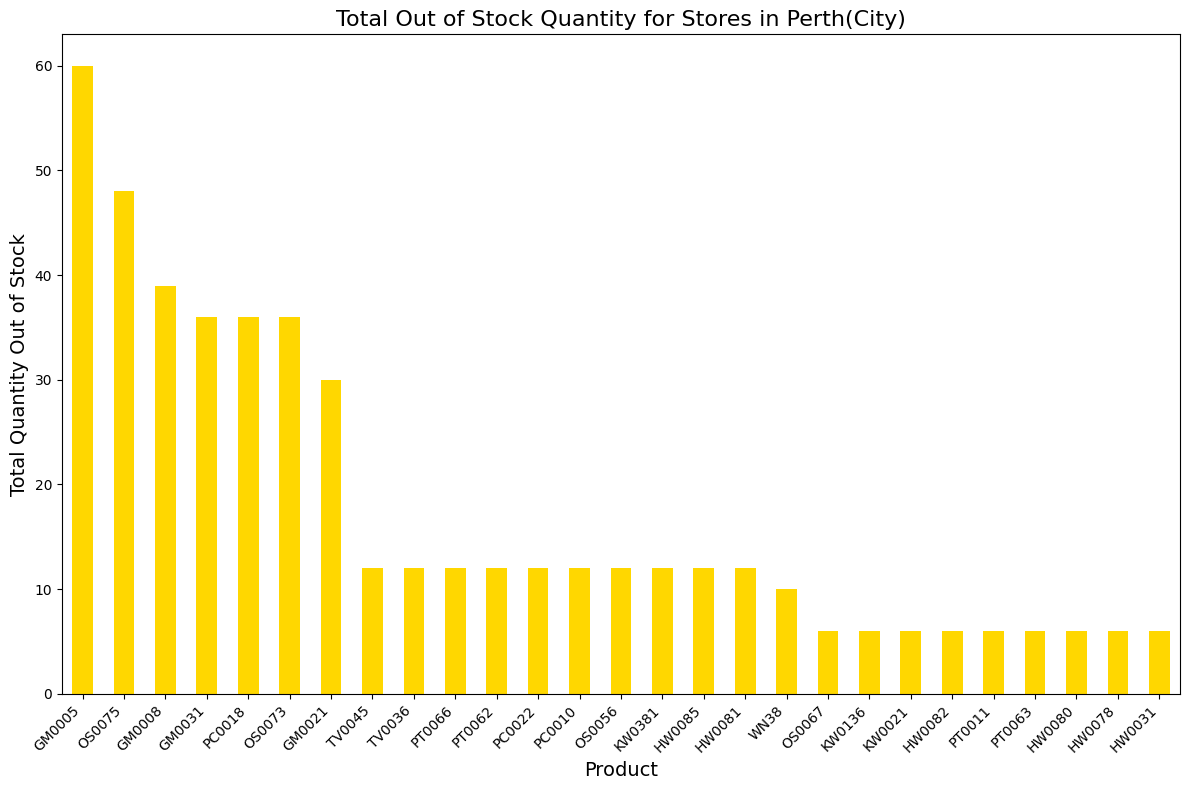

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 Stock0815_df 是整个数据集的 DataFrame
# 过滤出 Suburb 为 "Perth" 的行
perth_data = Stock0823_df[Stock0823_df['suburb'].str.contains('Perth', na=False, case=False)]

# 合并所有的 'Out of Stock' 和相应的 'Quantity' 列
products = []
quantities = []
descriptions = []

for i in range(13):  # 假设有13对 'Out of Stock' 和 'Quantity' 列
    product_col = f'Out of Stock'
    quantity_col = f'Quantity'
    description_col = f'Description'
    if i > 0:
        product_col += f'.{i}'
        quantity_col += f'.{i}'
        description_col += f'.{i}'

    products.extend(perth_data[product_col])
    quantities.extend(perth_data[quantity_col])
    descriptions.extend(perth_data[description_col])

# 创建一个DataFrame来存储产品、描述和数量
perth_products = pd.DataFrame({'Product': products, 'Description': descriptions, 'Quantity': quantities})

# 删除 NaN 值
perth_products.dropna(inplace=True)

# 确保 'Quantity' 列是数值类型，并转换为整数
perth_products['Quantity'] = pd.to_numeric(perth_products['Quantity'], errors='coerce').fillna(0).astype(int)

# 过滤掉数量为0的行
perth_products = perth_products[perth_products['Quantity'] > 0]

# 合并 'Product' 和 'Description' 为一个新的列 'Product_Description'
perth_products['Product_Description'] = perth_products['Product'] + ' - ' + perth_products['Description']

# 计算每个产品的总缺货数量（不合并描述）
perth_product_totals = perth_products.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False)

# 只获取产品名用于x轴标签
product_names = perth_products.groupby('Product')['Quantity'].sum().sort_values(ascending=False).index

# 设置Pandas显示选项，以完整显示内容
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_colwidth', None)  # 不截断列内容

# 打印产品总数，显示产品和描述的组合
print(perth_product_totals)

# 可视化结果，仅显示产品名称
plt.figure(figsize=(12, 8))
perth_product_totals.plot(kind='bar', color='gold')
plt.title('Total Out of Stock Quantity for Stores in Perth(City)', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity Out of Stock', fontsize=14)
plt.xticks(ticks=range(len(product_names)), labels=product_names, rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
